In [392]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb

In [393]:
dataframe = pd.read_csv(r"TipoPalabra_conteos_umbral_mean_relsemanf_TEST_CLASS.csv")
dataframe

,CLASS,NOUN_NOUN,NOUN_ADJ,NOUN_VERB,NOUN_ADV,ADJ_NOUN,ADJ_ADJ,ADJ_VERB,ADJ_ADV,VERB_NOUN,...,VERB_ADV_,ADV_NOUN_,ADV_ADJ_,ADV_VERB_,ADV_ADV_,sinonimos,antonimos,hiperonimos,hiponimos,relacionesf
0,neutral,33.796183,0.000000,0.380474,0.000000,1.183103,0.000000,0.093333,0.000000,9.692574,...,0,0,0,0,0,1,0,0,0,9
1,entailment,33.623150,0.000000,5.847821,0.000000,2.113398,0.000000,0.976824,0.000000,13.282438,...,0,0,0,0,0,2,0,0,0,5
2,contradiction,57.016686,0.000000,0.000000,0.000000,6.759290,0.000000,0.000000,0.000000,29.846165,...,0,0,0,0,0,1,0,0,0,5
3,neutral,6.618415,2.169392,0.164617,0.000000,1.281069,2.715726,0.032713,0.000000,0.000000,...,0,0,0,1,0,1,0,0,0,0
4,entailment,6.618415,6.273093,0.164617,2.900523,1.281069,3.007881,0.032713,1.905221,0.000000,...,0,0,1,1,1,2,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9813,contradiction,8.402205,0.345277,1.433197,0.000000,0.000000,0.000000,0.000000,0.000000,1.308104,...,0,0,0,0,0,2,0,0,0,1
9814,entailment,8.400454,0.000000,1.437402,0.000000,0.000000,0.000000,0.000000,0.000000,1.100578,...,0,0,0,0,0,1,0,0,1,1
9815,contradiction,12.970977,0.000000,4.538058,0.000000,2.155510,0.000000,0.596163,0.000000,2.151257,...,0,0,0,0,0,1,0,0,0,5
9816,entailment,14.799540,0.000000,8.943353,0.000000,3.110718,0.000000,1.953732,0.000000,2.341955,...,0,0,0,0,0,3,0,0,0,2


In [394]:
dataframe.describe()

,NOUN_NOUN,NOUN_ADJ,NOUN_VERB,NOUN_ADV,ADJ_NOUN,ADJ_ADJ,ADJ_VERB,ADJ_ADV,VERB_NOUN,VERB_ADJ,...,VERB_ADV_,ADV_NOUN_,ADV_ADJ_,ADV_VERB_,ADV_ADV_,sinonimos,antonimos,hiperonimos,hiponimos,relacionesf
count,9818.000000,9818.000000,9818.000000,9818.000000,9818.000000,9818.000000,9818.000000,9818.000000,9818.000000,9818.000000,...,9818.000000,9818.000000,9818.000000,9818.000000,9818.000000,9818.000000,9818.000000,9818.000000,9818.000000,9818.000000
mean,16.394475,1.688639,3.837294,0.603821,2.767825,1.354010,0.605392,0.106982,2.759923,0.372364,...,0.217050,0.162762,0.034834,0.156244,0.034834,2.132817,0.043288,0.267875,0.228967,1.957425
std,11.669398,3.285123,4.011487,1.855389,3.871794,3.867684,1.237705,0.531202,3.101191,1.050108,...,0.682324,0.634474,0.242245,0.593188,0.232810,1.567236,0.222179,0.594145,0.514957,2.289619
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.537189,0.000000,0.788176,0.000000,0.000000,0.000000,0.000000,0.000000,0.544852,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,13.675768,0.000000,2.964725,0.000000,1.548549,0.000000,0.000000,0.000000,1.914624,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
75%,20.745081,2.462749,5.459814,0.000000,4.024013,0.521103,0.818806,0.000000,3.863960,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,3.000000
max,189.305465,46.465061,42.412623,21.441619,41.643242,92.507743,17.164005,9.572460,34.803299,15.453038,...,9.000000,11.000000,5.000000,13.000000,6.000000,14.000000,3.000000,7.000000,4.000000,46.000000


In [395]:
print(dataframe.groupby('CLASS').size())

CLASS
contradiction    3235
entailment       3366
neutral          3217
dtype: int64


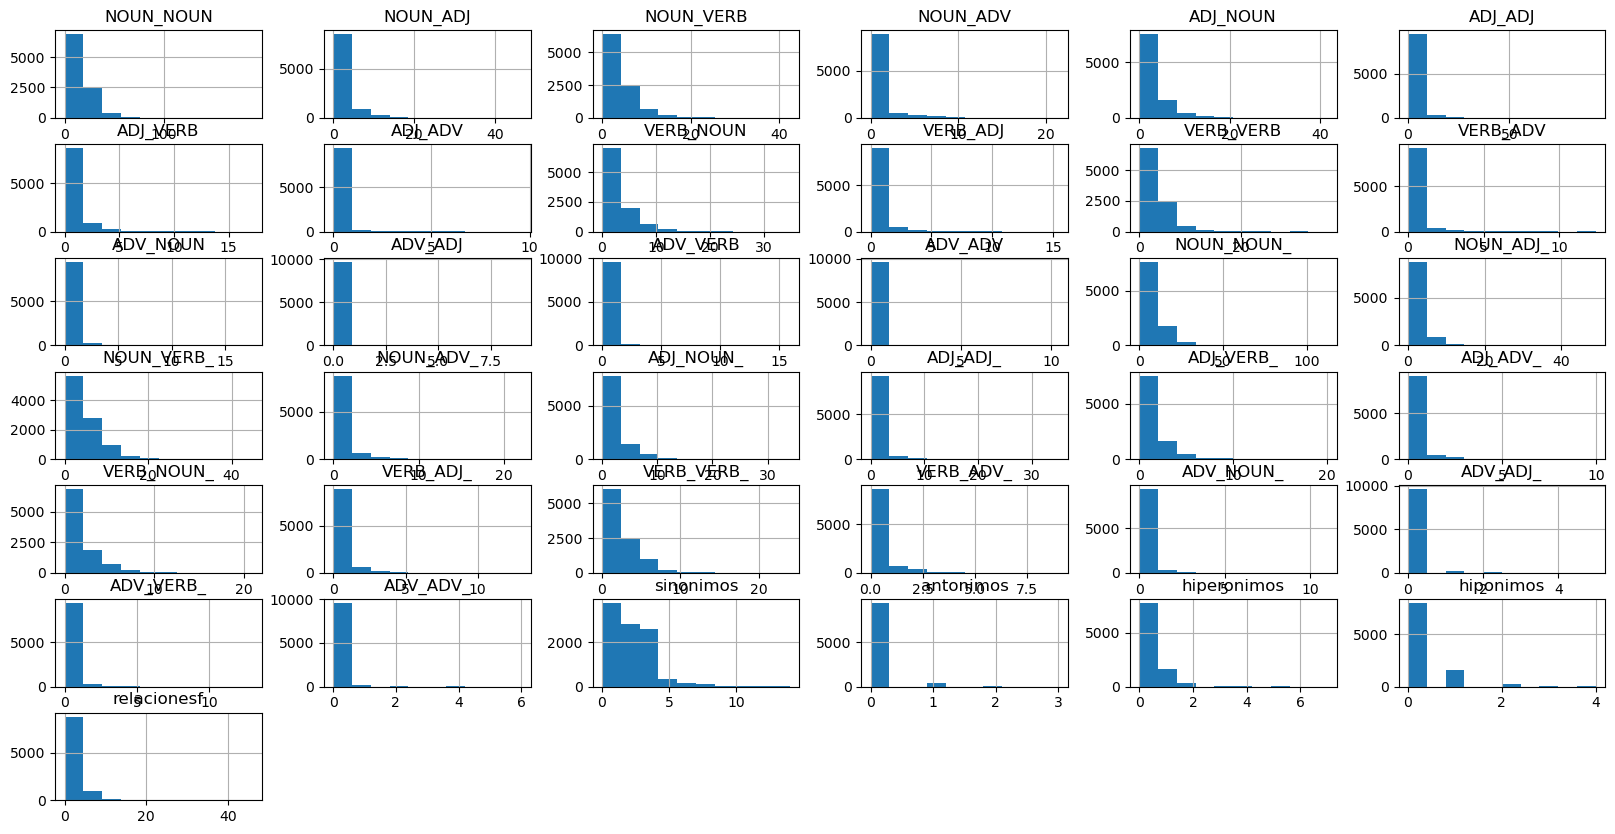

In [396]:
dataframe.hist(figsize=(20,10))
plt.show()

In [397]:
X = np.array(dataframe.drop(['CLASS'],1))
X_test = np.array(dataframe.drop(['CLASS'],1))
y = np.array(dataframe['CLASS'])
y_test =np.array(dataframe['CLASS'])
X.shape

(9818, 37)

In [398]:
y_test

array(['neutral', 'entailment', 'contradiction', ..., 'contradiction',
       'entailment', 'neutral'], dtype=object)

In [399]:
y

array(['neutral', 'entailment', 'contradiction', ..., 'contradiction',
       'entailment', 'neutral'], dtype=object)

In [400]:
model = linear_model.LogisticRegression(penalty="l2", C=0.1)
model.fit(X,y)

/home/david/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.1)

In [401]:
model.get_params()

{'C': 0.1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [402]:
model.decision_function(X)

array([[ 0.88417625, -0.91142379,  0.02724754],
       [ 0.06956499, -0.45585043,  0.38628544],
       [ 0.00313696, -1.11767772,  1.11454076],
       ...,
       [ 0.54928455, -0.40172169, -0.14756286],
       [-0.39081626,  0.48046986, -0.0896536 ],
       [ 0.16399824, -0.19435581,  0.03035757]])

In [403]:
labels=dataframe.columns[1:]

In [404]:
model.classes_

array(['contradiction', 'entailment', 'neutral'], dtype=object)

In [405]:
contradiction=model.coef_[0]
entailment=model.coef_[1]
neutral=model.coef_[2]

In [406]:
print("Contradiction ",np.argmax(contradiction),labels[np.argmax(contradiction)],np.argmin(contradiction),labels[np.argmin(contradiction)])
print("Entailment ",np.argmax(entailment),labels[np.argmax(entailment)],np.argmin(entailment),labels[np.argmin(entailment)])
print("Neutral ",np.argmax(neutral),labels[np.argmax(neutral)],np.argmin(neutral),labels[np.argmin(neutral)])

Contradiction  33 antonimos 32 sinonimos
Entailment  32 sinonimos 33 antonimos
Neutral  23 ADJ_ADV_ 33 antonimos


In [407]:
n_columns=dataframe.shape[1]-1

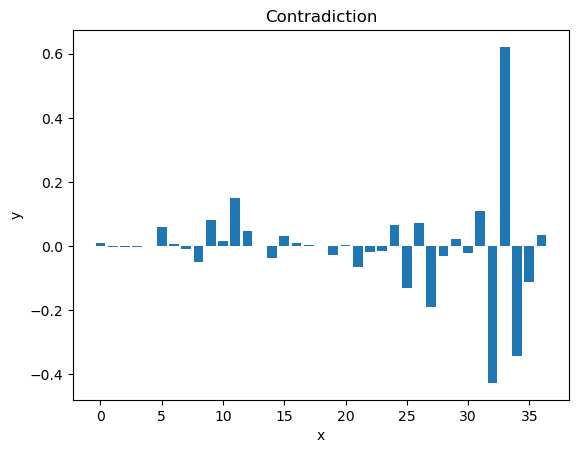

In [408]:
import matplotlib.pyplot as plt
import numpy as np

x_v = np.arange(0,n_columns,1)
y_v = contradiction

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Contradiction')
plt.show()

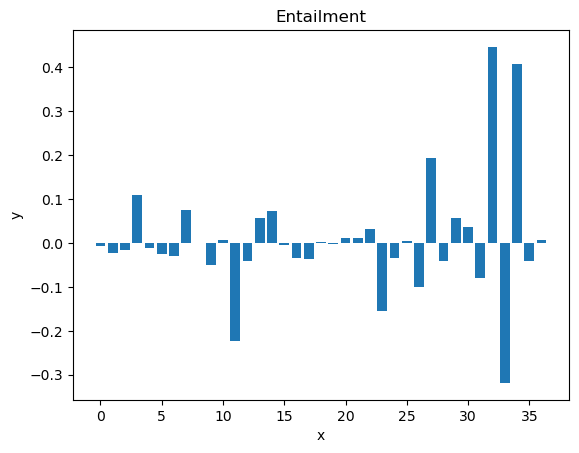

In [409]:
x_v = np.arange(0,n_columns,1)
y_v = entailment

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Entailment')
plt.show()

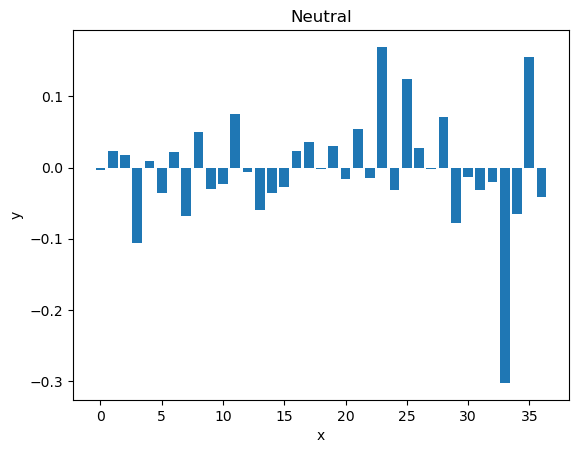

In [410]:
x_v = np.arange(0,n_columns,1)
y_v = neutral

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Neutral')
plt.show()

In [411]:
predictions = model.predict(X)
print(predictions)

['contradiction' 'neutral' 'neutral' ... 'contradiction' 'entailment'
 'contradiction']


In [412]:
y

array(['neutral', 'entailment', 'contradiction', ..., 'contradiction',
       'entailment', 'neutral'], dtype=object)

In [413]:
X

array([[33.79618263,  0.        ,  0.3804743 , ...,  0.        ,
         0.        ,  9.        ],
       [33.62315011,  0.        ,  5.84782112, ...,  0.        ,
         0.        ,  5.        ],
       [57.01668584,  0.        ,  0.        , ...,  0.        ,
         0.        ,  5.        ],
       ...,
       [12.97097707,  0.        ,  4.53805836, ...,  0.        ,
         0.        ,  5.        ],
       [14.79953998,  0.        ,  8.9433526 , ...,  0.        ,
         0.        ,  2.        ],
       [24.3453607 ,  0.        ,  8.47157582, ...,  0.        ,
         0.        ,  3.        ]])

In [414]:
model.score(X,y)

0.5315746587899776

In [415]:
print(confusion_matrix(y, predictions))

[[1958  734  543]
 [ 655 2226  485]
 [1158 1024 1035]]


In [416]:
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=validation_size)

In [417]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

/home/david/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/david/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

Logistic Regression: 0.523683 (0.035542)


/home/david/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [418]:
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))

0.5376782077393075


In [419]:
print(confusion_matrix(Y_validation, predictions))

[[370 155  91]
 [121 472 107]
 [225 209 214]]


In [420]:
print(classification_report(Y_validation, predictions))

               precision    recall  f1-score   support

contradiction       0.52      0.60      0.56       616
   entailment       0.56      0.67      0.61       700
      neutral       0.52      0.33      0.40       648

     accuracy                           0.54      1964
    macro avg       0.53      0.54      0.52      1964
 weighted avg       0.53      0.54      0.53      1964



In [421]:
#X_new = pd.DataFrame()
#model.predict(X_new)